# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data 

In [2]:
fb_spin = pd.read_csv('../datasets/mlb_fb_spin_direction_21_cleaned.csv')
#fb_spin.year.fillna(2020, inplace = True)
#fb_spin.drop(columns = ['api_pitch_type'], inplace = True)
print(fb_spin.shape)
fb_spin.head()

(448, 29)


,player_id,year,last_name,first_name,throws,n_pitches,velo,spin_rate,movement_inches,alan_active_spin_pct,...,diff_measured_inferred_minutes,spin_based_dir_hh,spin_based_dir_mm,observed_dir_hh,observed_dir_mm,obs_dev_diff_hh,obs_dev_diff_mm,hawkeye_measured_clock_label,movement_inferred_clock_label,diff_clock_label
0,669952,2020.0,White,Mitch,R,317,94.6,2366,17.0,0.788748,...,15,12,30,12,15,0,15,12:30,12:15,+0H 15M
1,579328,2020.0,Kikuchi,Yusei,L,749,95.3,2216,18.9,0.893902,...,-15,10,45,11,0,0,15,10:45,11:00,-0H 15M
2,451584,2020.0,Davis,Wade,R,270,92.6,2384,17.3,0.802337,...,15,12,30,12,15,0,15,12:30,12:15,+0H 15M
3,650496,2020.0,Mejia,J.C.,R,149,93.0,2199,11.7,0.561406,...,15,1,45,1,30,0,15,1:45,1:30,+0H 15M
4,605441,2020.0,Ríos,Yacksel,R,135,96.9,2053,18.1,0.916144,...,0,1,0,1,0,0,0,1:00,1:00,0H 00M


# Data Cleaning 

In [3]:
fb_spin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_id                        448 non-null    int64  
 1   year                             448 non-null    float64
 2   last_name                        448 non-null    object 
 3    first_name                      448 non-null    object 
 4   throws                           448 non-null    object 
 5   n_pitches                        448 non-null    int64  
 6   velo                             448 non-null    float64
 7   spin_rate                        448 non-null    int64  
 8   movement_inches                  448 non-null    float64
 9   alan_active_spin_pct             448 non-null    float64
 10  active_spin                      448 non-null    float64
 11  hawkeye_measured                 448 non-null    float64
 12  movement_inferred     

# EDA

In [4]:
fb_spin.describe()

,player_id,year,n_pitches,velo,spin_rate,movement_inches,alan_active_spin_pct,active_spin,hawkeye_measured,movement_inferred,...,movement_inferred_clock_minutes,diff_measured_inferred,diff2,diff_measured_inferred_minutes,spin_based_dir_hh,spin_based_dir_mm,observed_dir_hh,observed_dir_mm,obs_dev_diff_hh,obs_dev_diff_mm
count,448.000000,448.0,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,605900.406250,2020.0,406.988839,93.574107,2271.316964,17.580804,0.834305,0.894421,166.847298,168.836028,...,510.937500,-1.988729,6.276767,3.883929,6.542411,21.026786,8.131696,23.035714,0.002232,12.790179
std,62333.185748,0.0,264.529877,2.162307,151.508544,2.130683,0.097922,0.086404,31.441408,27.340165,...,303.851327,7.345677,4.293823,16.209062,5.136872,17.022664,4.916582,16.989366,0.047246,10.288052
min,425794.000000,2020.0,100.000000,82.500000,1854.000000,8.300000,0.373779,0.498743,33.151655,5.031354,...,60.000000,-23.811121,0.005144,-60.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,577913.000000,2020.0,201.750000,92.400000,2167.000000,16.400000,0.787649,0.852416,145.001996,150.270843,...,75.000000,-7.062856,3.139456,0.000000,1.000000,0.000000,1.000000,15.000000,0.000000,0.000000
50%,621109.000000,2020.0,342.000000,93.700000,2269.000000,17.900000,0.850032,0.913478,155.608199,161.109909,...,675.000000,-3.145928,5.484259,0.000000,10.000000,15.000000,11.000000,30.000000,0.000000,15.000000
75%,656901.500000,2020.0,529.000000,94.900000,2371.000000,19.000000,0.903859,0.965423,199.533303,190.443208,...,750.000000,3.111448,8.626584,15.000000,12.000000,30.000000,12.000000,45.000000,0.000000,15.000000
max,685503.000000,2020.0,1446.000000,99.200000,2776.000000,22.200000,1.008745,0.997113,263.142346,260.672843,...,765.000000,28.120301,28.120301,45.000000,12.000000,45.000000,12.000000,45.000000,1.000000,45.000000


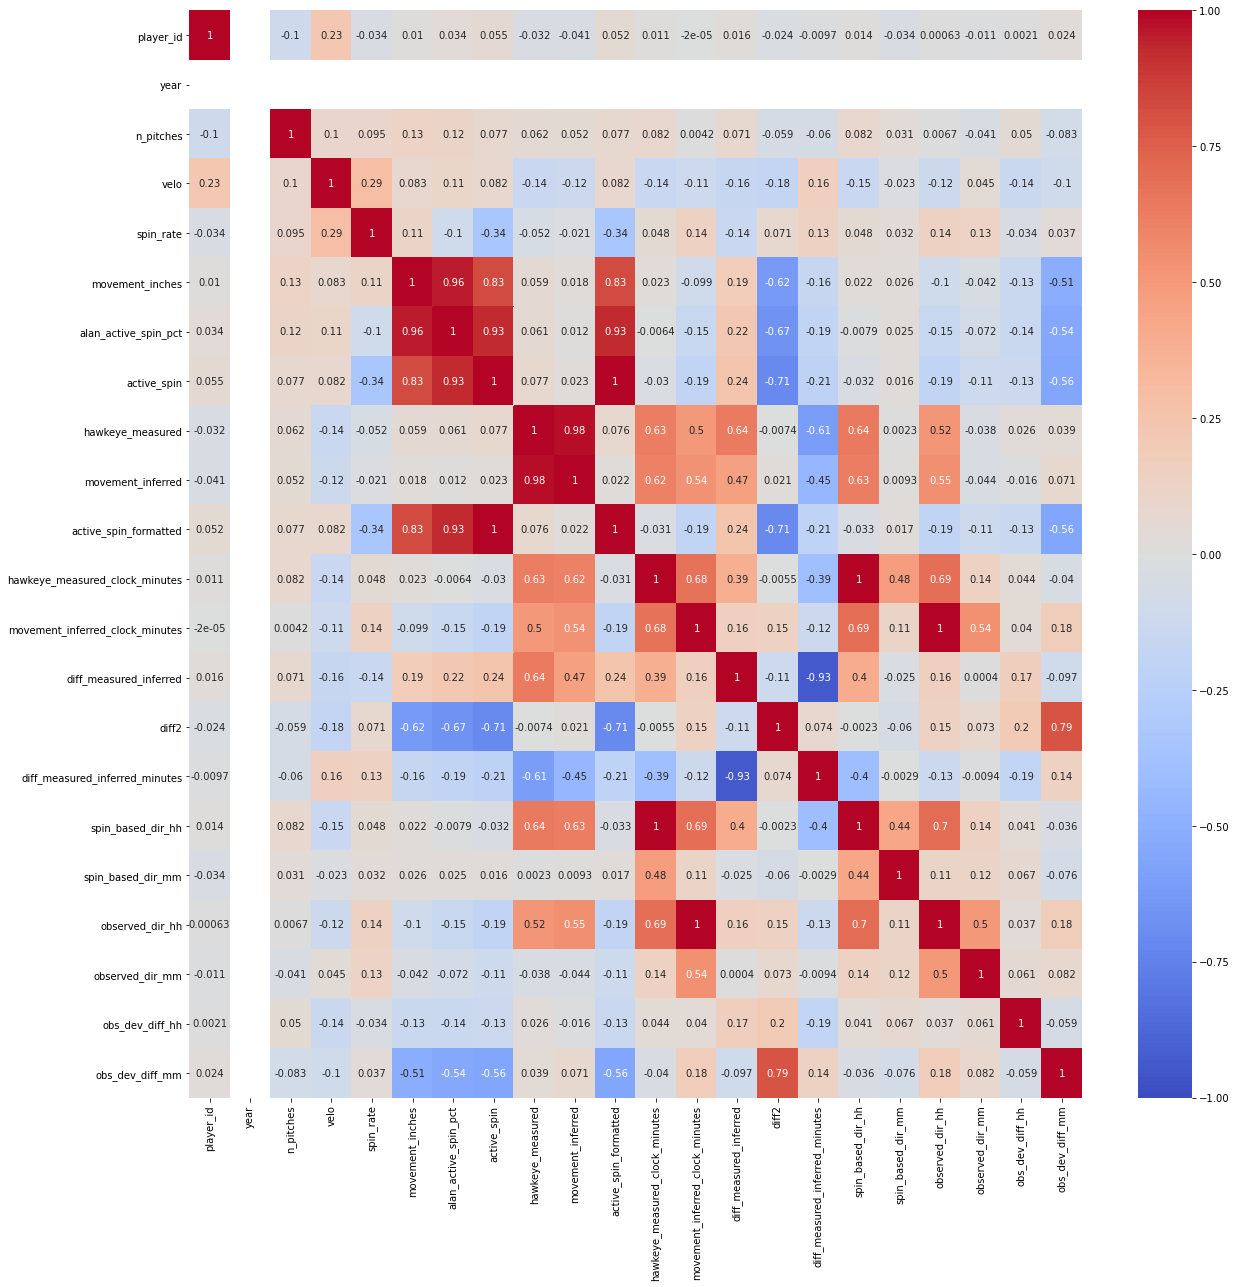

In [5]:
plt.figure(figsize = (20, 20))
sns.heatmap(fb_spin.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm');